In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Geometric Brownian Motion ###
From the perspective of any derivative model, the most important assumption concerns the evolution of the underlying asset price.

The most well known assumption about the underlying asset price is that it follows Geometric Brownian motion represented by the following stochastic PDE
$$
\begin{align}
dS &= \mu Sdt + \sigma Sdw \\
dz &= d(\ln{S}) = (\mu - \frac{1}{2}\sigma^{2})dt + \sigma dw\\
S(t) &= S_{0}\exp{(\int_{0}^{t}dz(u))}
\end{align}
$$
where $\mu$ and $\sigma$ are adapted processes and $dw$ is a Brownian motion.

In [12]:
def S1_GBM(S0: float, mu: list, sigma: list, T: float, n: int, nsim: int) -> list:
    '''
    S0: initial asset price
    mu: mean rate of asset return
    sigma: asset volatility
    T: time period
    n: number of steps
    nsim: number of simulation of the asset price process
    '''
    dt = T/n
    dw = np.sqrt(dt)*np.random.standard_normal(size=(nsim,n)) # generate the (nsim, n) brownian motion sample
    dz = (mu-0.5*sigma**2)*dt + sigma*dw 
    Sn = np.exp(np.cumsum(dz, axis=1)) # generate the (nsim, n) geometric brownian momtion price process    
    Sn = S0*np.concatenate((np.ones(shape=(nsim,1)),Sn), axis=1) # add the initial value

    return (Sn)



In [20]:
#constant parameters
S0=10
T=1
n=50
nsim=10
mu=1.05
sigma=0.1

t_points=np.linspace(0,T,n+1)
stock_price=S1_GBM(S0,mu,sigma,T,n,nsim)

Text(0.5, 1.0, 'constant parameters')

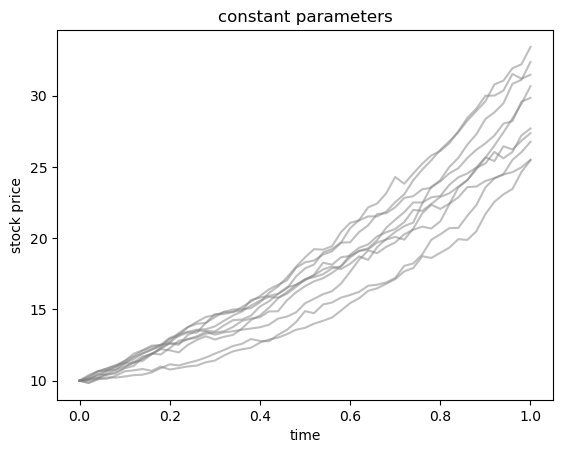

In [21]:
#plot prices (constant parameters)
fig,ax=plt.subplots()
for row in range(nsim):
    ax.plot(t_points,stock_price[row,:],color='grey',alpha=0.5)
ax.set_xlabel('time')
ax.set_ylabel('stock price')
ax.set_title('constant parameters')

In [18]:
#random parameters
S0=10
T=1
n=50
nsim=10
mu=1.05*np.random.rand(n)
sigma=0.1*np.random.rand(n)

t_points=np.linspace(0,T,n+1)
stock_price=S1_GBM(S0,mu,sigma,T,n,nsim)

Text(0.5, 1.0, 'random parameters')

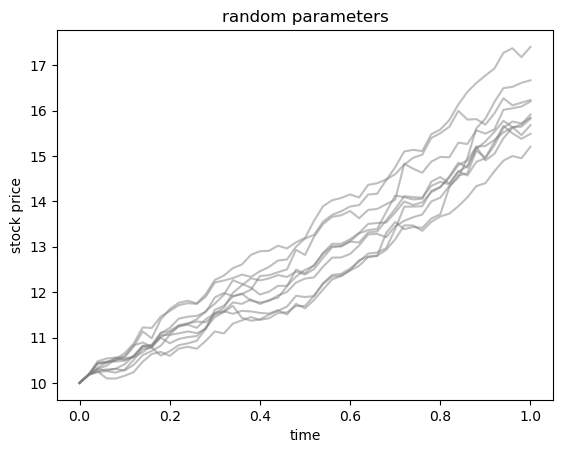

In [19]:
#plot prices (random parameters)
fig,ax=plt.subplots()
for row in range(nsim):
    ax.plot(t_points,stock_price[row,:],color='grey',alpha=0.5)
ax.set_xlabel('time')
ax.set_ylabel('stock price')
ax.set_title('random parameters')